In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows',500)


![CRISP_DM](Crisp_DM_Tasks.png)

# Data Preparation

* focus is always to understand the final data structure

* support each step by visual analytics

# Johns Hopkins GITHUB csv data

In [2]:
data_path='C:/ProgramData/Anaconda3/eps_covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [3]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/16/20', '8/17/20', '8/18/20', '8/19/20', '8/20/20', '8/21/20',
       '8/22/20', '8/23/20', '8/24/20', '8/25/20'],
      dtype='object', length=217)

In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
# len(pd_raw['Country/Region'].unique())

In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [8]:
pd_raw[pd_raw['Country/Region']=='Australia'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [9]:
country_list=['Albania',
              'India',
              'Italy',
              'Germany',
              'US'
             ]

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [11]:
df_plot

,date,Albania,India,Italy,Germany,US
0,1/22/20,0,0,0,0,1
1,1/23/20,0,0,0,0,1
2,1/24/20,0,0,0,0,2
3,1/25/20,0,0,0,0,2
4,1/26/20,0,0,0,0,5
5,1/27/20,0,0,0,1,5
6,1/28/20,0,0,0,4,5
7,1/29/20,0,0,0,4,5
8,1/30/20,0,1,0,4,5
9,1/31/20,0,1,2,5,7


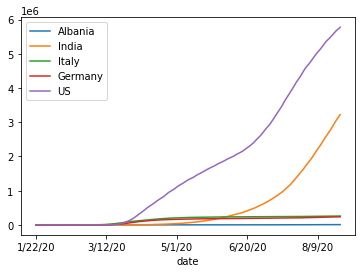

In [12]:
df_plot.set_index('date').plot()

# Data Type Date

In [13]:
df_plot.head()

,date,Albania,India,Italy,Germany,US
0,1/22/20,0,0,0,0,1
1,1/23/20,0,0,0,0,1
2,1/24/20,0,0,0,0,2
3,1/25/20,0,0,0,0,2
4,1/26/20,0,0,0,0,5


In [14]:
# from datetime import datetime

In [15]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [16]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df_plot.head()

,date,Albania,India,Italy,Germany,US
0,2020-01-22,0,0,0,0,1
1,2020-01-23,0,0,0,0,1
2,2020-01-24,0,0,0,0,2
3,2020-01-25,0,0,0,0,2
4,2020-01-26,0,0,0,0,5


In [18]:
df_plot.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_small_flat_table.csv', sep=';',index=False)

# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:
* It must contain a unique value for each row of data.
* It cannot contain null values.

In [19]:
data_path='C:/ProgramData/Anaconda3/eps_covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [20]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                                   'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [21]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070
1,no,Albania,0,0,0,0,0,0,0,0,...,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759
2,no,Algeria,0,0,0,0,0,0,0,0,...,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228
3,no,Andorra,0,0,0,0,0,0,0,0,...,989,1005,1005,1024,1024,1045,1045,1045,1060,1060
4,no,Angola,0,0,0,0,0,0,0,0,...,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283


In [22]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [23]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [24]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [25]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
#df_plot.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_relational_confirmed.csv',sep=';')

In [27]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_relational_confirmed.csv',sep=';',index=False)


In [28]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
56644 2020-08-21    no      US    5622540
56910 2020-08-22    no      US    5667112
57176 2020-08-23    no      US    5701679
57442 2020-08-24    no      US    5739724
57708 2020-08-25    no      US    5777710


# Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file


In [29]:
data_path='C:/ProgramData/Anaconda3/eps_covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,604,605,606,613,619,622,626,629,633,628
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,469,474,476,490,494,501,503,510,510,511
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,860,863,887,901,912,930,931,934,946,967


In [30]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [31]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


# update the large relational file

In [32]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [33]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [34]:
pd_relational_model_all.to_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [35]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date    state country  confirmed
57505  2020-01-22  Alabama      US          0
57506  2020-01-22  Alabama      US          0
57507  2020-01-22  Alabama      US          0
57508  2020-01-22  Alabama      US          0
57509  2020-01-22  Alabama      US          0
...           ...      ...     ...        ...
782280 2020-08-25  Wyoming      US        412
782281 2020-08-25  Wyoming      US        283
782282 2020-08-25  Wyoming      US          0
782283 2020-08-25  Wyoming      US        108
782284 2020-08-25  Wyoming      US         11

[724780 rows x 4 columns]


### cross check on full sum US data

In [36]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [37]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5


# Group-by apply

In [38]:
pd_JH_data=pd.read_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


In [39]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-07-30')]

In [40]:
test_data#.head()

,date,state,country,confirmed
50849,2020-07-31,no,Germany,210399
50889,2020-07-31,no,US,4562107
51115,2020-08-01,no,Germany,211005
51155,2020-08-01,no,US,4620592
51381,2020-08-02,no,Germany,211220
51420,2020-08-02,no,US,4668172
51647,2020-08-03,no,Germany,212111
51687,2020-08-03,no,US,4713540
51912,2020-08-04,no,Germany,212828
51952,2020-08-04,no,US,4771080


In [41]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-08-25,no,237583
US,2020-08-25,no,5777710


In [42]:
# %load C:/ProgramData/Anaconda3/eps_covid19/src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate
        Parameters:
        ----------
        in_array : pandas.series
        Returns:
        ----------
        Doubling rate: double
    '''

    #print(in_array)
    #print(type)
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    #y = np.array(in_array['confirmed'])
    #X = np.arange(len(y)).reshape(-1, 1)
    
    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))


the test slope is: [2.]


In [43]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-08-25     237583
      US      2020-08-25    5777710

In [44]:
# this command will only work when adapting the get_doubling_time_via_regression function

#test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [45]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [46]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  50849           NaN
                51115           NaN
                51381    513.701989
                51647    382.360458
                51912    263.747512
                52179    212.804529
                52445    193.571536
                52709    206.544407
                52976    231.809013
                53242    397.061661
                53507    271.110696
                53775    194.001184
                54040    186.844463
                54307    161.177186
                54571    151.644156
                54838    202.555505
                55104    369.126096
                55369    203.795961
                55637    145.588821
                55902    151.813262
                56168    144.833544
                56435    139.237035
                56701    181.181264
                56966    319.173606
                57233    207.718414
                57498    152.843207
       US       50889           NaN
      

In [47]:
test_data

,date,state,country,confirmed
50849,2020-07-31,no,Germany,210399
50889,2020-07-31,no,US,4562107
51115,2020-08-01,no,Germany,211005
51155,2020-08-01,no,US,4620592
51381,2020-08-02,no,Germany,211220
51420,2020-08-02,no,US,4668172
51647,2020-08-03,no,Germany,212111
51687,2020-08-03,no,US,4713540
51912,2020-08-04,no,Germany,212828
51952,2020-08-04,no,US,4771080


In [48]:
#pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

In [49]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [50]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                            'level_2':'index'})
pd_DR_result.head()

,state,country,index,doubling_rate
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,998,NaN
4,Alberta,Canada,1231,NaN


In [51]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [52]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index', 'doubling_rate']],on=['index'],how='left')

In [53]:
pd_result_larg

,index,date,state,country,confirmed,doubling_rate
0,0,2020-01-22,Alberta,Canada,0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN
2,2,2020-01-22,no,Kosovo,0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN
...,...,...,...,...,...,...
57717,57717,2020-08-25,no,Barbados,164,108.000000
57718,57718,2020-08-25,no,Belarus,70727,545.276705
57719,57719,2020-08-25,no,Belgium,82447,321.559035
57720,57720,2020-08-25,no,Albania,8759,51.789157
